In [2]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.Sarimax import Sarimax
from statsmodels.tsa.arima.model import ARIMA

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pmdarima.arima import auto_arima #SARIMAX using pmdarima
from skforecast.ForecasterSarimax import ForecasterSarimax

SARIMAX for Visayas

In [4]:
labels_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/train_labels_transformed.csv'
data_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/train_data_transformed.csv'
test_data_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/test_data.csv'
test_labels_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/test_labels.csv'
transformed_data=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/data_transformed.csv'
vis_complete_data = '/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/VIS_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

vis_complete_data_df = pd.read_csv(vis_complete_data)
vis_gwap = vis_complete_data_df[['GWAP']]
vis_lwap = vis_complete_data_df[['LWAP']]



In [5]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)


In [6]:
#Preparing the dataframes
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)

transformed_train_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_VIS','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Catbalogan', '9':'TMAX_Catbalogan', '10':'TMIN_Catbalogan','11':'RAINFALL_Roxas City','12':'TMAX_Roxas City','13':'TMIN_Roxas City','14':'RAINFALL_Catarman','15':'TMAX_Catarman','16':'TMIN_Catarman','17':'RAINFALL_Maasin','18':'TMAX_Maasin','19':'TMIN_Maasin','20':'RAINFALL_Dumaguete','21':'TMAX_Dumaguete','22':'TMIN_Dumaguete'}, inplace=True)
data_columns = ['GWAP', 'LWAP', 'FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Catbalogan','TMAX_Catbalogan','TMIN_Catbalogan','RAINFALL_Roxas City','TMAX_Roxas City','TMIN_Roxas City','RAINFALL_Catarman','TMAX_Catarman','TMIN_Catarman','RAINFALL_Maasin','TMAX_Maasin','TMIN_Maasin','RAINFALL_Dumaguete','TMAX_Dumaguete','TMIN_Dumaguete']
data_train = pd.DataFrame(transformed_train_data, columns = data_columns)
data_test = pd.DataFrame(test_data, columns = data_columns)

transformed_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Catbalogan', '9':'TMAX_Catbalogan', '10':'TMIN_Catbalogan','11':'RAINFALL_Roxas City','12':'TMAX_Roxas City','13':'TMIN_Roxas City','14':'RAINFALL_Catarman','15':'TMAX_Catarman','16':'TMIN_Catarman','17':'RAINFALL_Maasin','18':'TMAX_Maasin','19':'TMIN_Maasin','20':'RAINFALL_Dumaguete','21':'TMAX_Dumaguete','22':'TMIN_Dumaguete'}, inplace=True)

In [7]:
#lagging the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Removing GWAP and LWAP
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])

#Preparing the exog datasets
train_exog = transformed_exog[:train_size]
test_exog = transformed_exog[train_size:]



In [8]:
#Preparing transformed GWAP datasets
VIS_GWAP_train = labels_train['GWAP']
VIS_GWAP_train = pd.concat([train_date,VIS_GWAP_train], axis=1)
VIS_GWAP_train.set_index('Date', inplace=True)
VIS_GWAP_train.index = pd.to_datetime(VIS_GWAP_train.index)
VIS_GWAP_train.index.freq='D'
VIS_GWAP_train = VIS_GWAP_train.squeeze()


VIS_GWAP_test = labels_test['GWAP']
VIS_GWAP_test = pd.concat([test_date,VIS_GWAP_test], axis=1)
VIS_GWAP_test.set_index('Date', inplace=True)
VIS_GWAP_test.index = pd.to_datetime(VIS_GWAP_test.index)
VIS_GWAP_test.index.freq='D'
VIS_GWAP_test = VIS_GWAP_test.squeeze()

#Preparing original GWAP datasets
VIS_GWAP = pd.concat([date_df,vis_gwap], axis=1)
VIS_GWAP.set_index('Date', inplace=True)
VIS_GWAP.index = pd.to_datetime(VIS_GWAP.index)
VIS_GWAP.index.freq='D'
VIS_GWAP = VIS_GWAP.squeeze()

VIS_GWAP_test_inversed = VIS_GWAP[train_size:]




#Preparing the transformed LWAP datasets
VIS_LWAP_train = labels_train['LWAP']
VIS_LWAP_train = pd.concat([train_date,VIS_LWAP_train], axis=1)
VIS_LWAP_train.set_index('Date', inplace=True)
VIS_LWAP_train.index = pd.to_datetime(VIS_LWAP_train.index)
VIS_LWAP_train.index.freq='D'
VIS_LWAP_train = VIS_LWAP_train.squeeze()

VIS_LWAP_test = labels_test['LWAP']
VIS_LWAP_test = pd.concat([test_date,VIS_LWAP_test], axis=1)
VIS_LWAP_test.set_index('Date', inplace=True)
VIS_LWAP_test.index = pd.to_datetime(VIS_LWAP_test.index)
VIS_LWAP_test.index.freq='D'
VIS_LWAP_test = VIS_LWAP_test.squeeze()

#Preparing the original LWAP datasets

VIS_LWAP = pd.concat([date_df,vis_lwap], axis=1)
VIS_LWAP.set_index('Date', inplace=True)
VIS_LWAP.index = pd.to_datetime(VIS_LWAP.index)
VIS_LWAP.index.freq='D'
VIS_LWAP = VIS_LWAP.squeeze()

VIS_LWAP_test_inversed = VIS_LWAP[train_size:]



#Preparing the exogenous datasets
VIS_exog_train = pd.concat([train_date,train_exog], axis=1)
VIS_exog_train.set_index('Date', inplace=True)

VIS_exog_test = pd.concat([test_date,test_exog], axis=1)
VIS_exog_test.set_index('Date', inplace=True)

In [9]:
#Plotting Train LWAP ang GWAP
# Create the line plot
vis_gwap_plot = px.line(VIS_GWAP_train, x=VIS_GWAP_train.index, y='GWAP')
vis_lwap_plot = px.line(VIS_LWAP_train, x=VIS_LWAP_train.index, y='LWAP')
# Set the title using the ticker value
vis_gwap_plot.update_layout(title=f"Visayas GWAP")
vis_lwap_plot.update_layout(title=f"Visasyas LWAP")
# Display the plot
vis_gwap_plot.show()
vis_lwap_plot.show()

In [10]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [11]:
#Checking for stationarity in GWAP data
perform_differencing(VIS_GWAP_train)
perform_differencing(VIS_LWAP_train)

VIS_diff_exog = perform_df_differencing(train_exog)
VIS_diff_exog = VIS_diff_exog.fillna(0)


Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'Hourly Demand' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 1 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.
Column 'TMIN_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'TMAX_Roxas City' is stationary after differencing 1 times.
Column 'TMIN_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 1 times.
Column 'TMAX_Catarman' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'TMIN_Catarman' is stationary after differencing 1 times.
Column 'RAINFALL_Maasin' is stationary after differencing 1 times.
Column 'TMAX_Maasin' is stationary after differencing 0 times.
Column 'TMIN_Maasin' is stationary after differencing 0 times.
Column 'RAINFALL_Dumaguete' is stationary after differencing 0 times.
Column 'TMAX_Dumaguete' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_51991/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

In [12]:
VIS_diff_exog = pd.concat([train_date,VIS_diff_exog], axis=1)
VIS_diff_exog.set_index('Date', inplace=True)

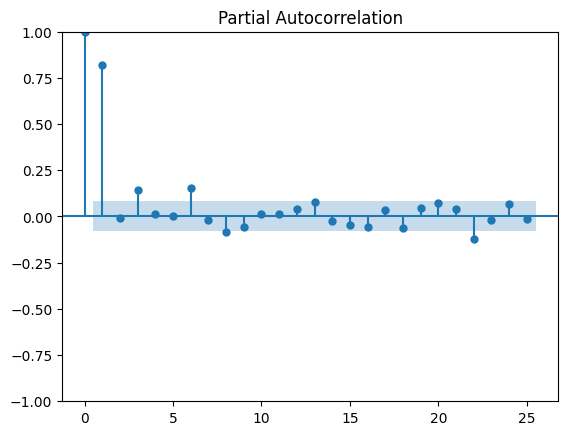

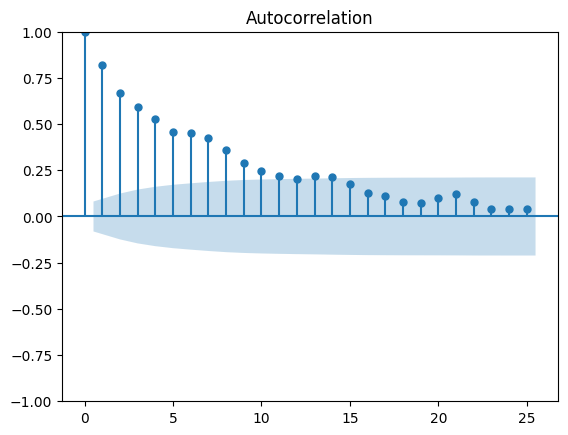

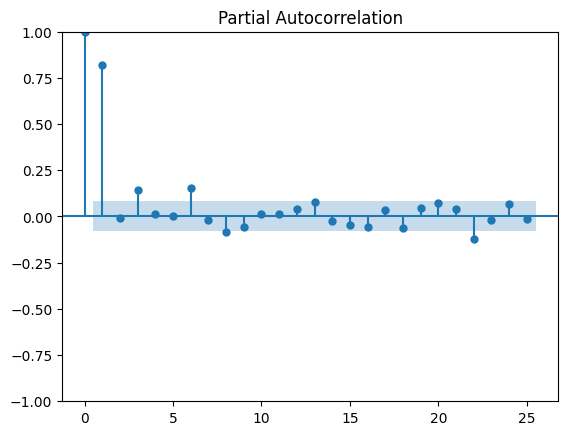

In [13]:
# Visualize autocorrelation using plot_acf
plot_acf(VIS_GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(VIS_GWAP_train, lags=25, alpha=0.05)

In [14]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 10
#Auto-Arima: Identification of best orders using AIC
VIS_GWAP_sarimax = auto_arima(VIS_GWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=10,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=VIS_diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1261.984, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1264.666, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1267.994, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1263.918, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1301.258, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1299.412, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1296.066, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1303.168, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1269.903, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1266.588, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1301.272, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1297.932, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.308 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,GWAP
2023-08-08,0.580043
2023-08-09,0.677591
2023-08-10,0.652174
2023-08-11,0.703848
2023-08-12,0.679384
2023-08-13,0.634557
2023-08-14,0.546373
2023-08-15,0.662355
2023-08-16,0.584127
2023-08-17,0.582402


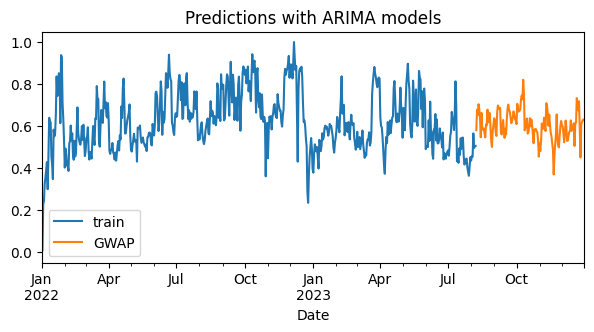

In [15]:
#Using skforecast
vis_gwap_model = Sarimax(order=(1, 1, 1), sm_predict_kwargs={'dynamic': True})
vis_gwap_model.fit(y=VIS_GWAP_train, exog= VIS_diff_exog)
vis_gwap_model.summary()

# Prediction
# ==============================================================================
vis_gwap_predictions = vis_gwap_model.predict(steps=len(VIS_GWAP_test), exog=test_exog)
vis_gwap_predictions.columns = ['GWAP']
display(vis_gwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
VIS_GWAP_train.plot(ax=ax, label='train')
vis_gwap_predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


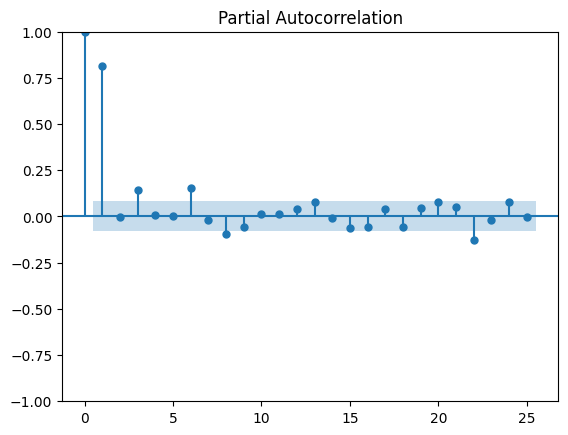

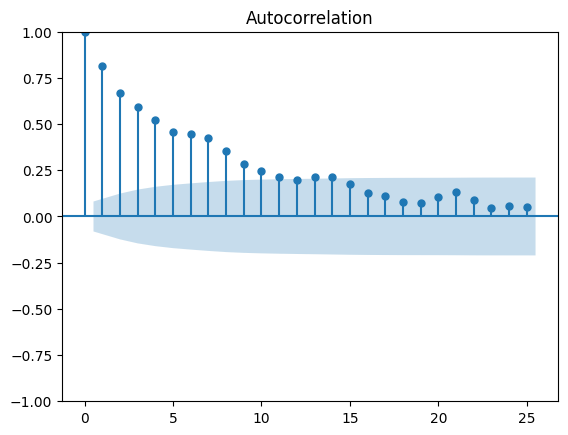

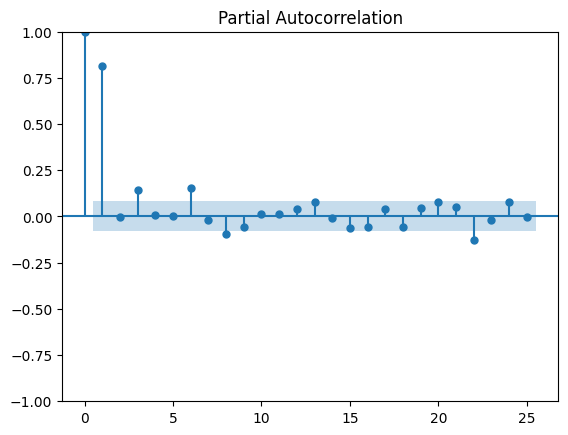

In [16]:
#VISAYAS LWAP
# Visualize autocorrelation using plot_acf
plot_acf(VIS_LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(VIS_LWAP_train, lags=25, alpha=0.05)

In [17]:
#PACF for LWAP cuts off at lag 1; ACF for LWAP cuts off at lag 10
#Auto-Arima: Identification of best orders using AIC
VIS_LWAP_sarimax = auto_arima(VIS_LWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=10, 
                            seasonal=False,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=False,
                            exog=VIS_diff_exog, iter=1000)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1156.763, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1164.534, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1192.481, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1195.235, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1193.243, Time=0.33 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-1203.576, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1160.510, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1200.212, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1196.642, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1195.524, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1193.547, Time=0.44 sec

Best model:  ARIMA(0,1,5)(0,0,0)[0] intercept
Total fit time: 2.491 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,LWAP
2023-08-08,0.528852
2023-08-09,0.516695
2023-08-10,0.518882
2023-08-11,0.511763
2023-08-12,0.508243
2023-08-13,0.508789
2023-08-14,0.528173
2023-08-15,0.493379
2023-08-16,0.514867
2023-08-17,0.504035


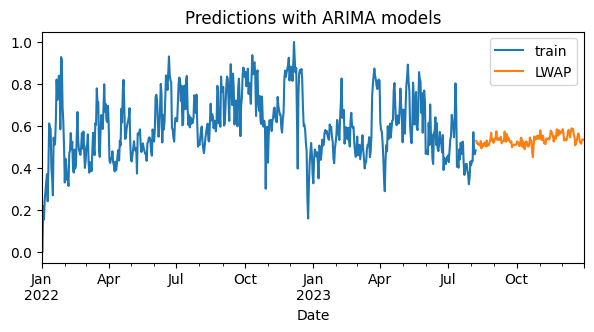

In [18]:
#Using skforecast
vis_model_lwap = Sarimax(order=(0, 1, 5), sm_predict_kwargs={'dynamic': True})
vis_model_lwap.fit(y=VIS_LWAP_train, exog= VIS_diff_exog)
vis_model_lwap.summary()

# Prediction
# ==============================================================================
vis_lwap_predictions = vis_model_lwap.predict(steps=len(VIS_LWAP_test), exog=test_exog)
vis_lwap_predictions.columns = ['LWAP']
display(vis_lwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
VIS_LWAP_train.plot(ax=ax, label='train')
vis_lwap_predictions.plot(ax=ax, label='LWAP Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


In [19]:
#Applying the inverse transformations
#Loading inverse transformations for Visayas

vis_minmax_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/minmax_scaler.pkl')
vis_boxcox_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/boxcox_pipeline.pkl')
vis_yeojohnson_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/yeojohnson_pipeline.pkl')
vis_boxcoxy_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/boxcox_pipeliney.pkl')

In [20]:
vis_predictions = pd.concat([vis_gwap_predictions, vis_lwap_predictions], axis=1)
vis_predictions_inverse=vis_boxcoxy_fit_loaded.inverse_transform(vis_predictions)
vis_predictions_inverse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[ 7253.33324942,  7087.30634365],
       [11114.4915166 ,  6772.22986283],
       [ 9930.62022355,  6827.68973457],
       [12499.36254341,  6649.00321658],
       [11203.58230417,  6562.63113909],
       [ 9190.37200413,  6575.94287987],
       [ 6280.74911523,  7069.28928152],
       [10387.62707474,  6211.81097313],
       [ 7381.9407644 ,  6726.24824186],
       [ 7327.32652783,  6461.05275037],
       [ 7528.69771523,  6663.95171525],
       [ 6817.88389206,  6902.216319  ],
       [ 6264.08915547,  6519.28580257],
       [ 8158.95372283,  6418.68983242],
       [ 7976.19516214,  7138.076931  ],
       [11137.03155976,  6484.33273589],
       [ 8536.52281322,  6738.8187217 ],
       [ 9165.59350776,  6595.95231907],
       [10379.31970725,  7000.44638246],
       [ 7636.33040872,  7366.77837264],
       [ 5836.19454173,  8219.29218841],
       [ 5175.57888643,  7132.55043579],
       [ 7136.11076506,  7357.3542044 ],
       [ 8051.53738846,  6847.07551607],
       [ 9300.05

In [21]:
vis_predictions_inverse_df = pd.DataFrame(vis_predictions_inverse)
vis_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

VIS_GWAP_predictions_inverse = pd.DataFrame(vis_predictions_inverse[:, 0], columns=['GWAP'])
VIS_GWAP_predictions_inverse = pd.concat([test_date,VIS_GWAP_predictions_inverse], axis=1)
VIS_GWAP_predictions_inverse.set_index('Date', inplace=True)
VIS_GWAP_predictions_inverse.index = pd.to_datetime(VIS_GWAP_predictions_inverse.index)
VIS_GWAP_predictions_inverse.index.freq='D'
VIS_GWAP_predictions_inverse = VIS_GWAP_predictions_inverse.squeeze()

VIS_LWAP_predictions_inverse = pd.DataFrame(vis_predictions_inverse[:, 0], columns=['LWAP'])
VIS_LWAP_predictions_inverse = pd.concat([test_date,VIS_LWAP_predictions_inverse], axis=1)
VIS_LWAP_predictions_inverse.set_index('Date', inplace=True)
VIS_LWAP_predictions_inverse.index = pd.to_datetime(VIS_LWAP_predictions_inverse.index)
VIS_LWAP_predictions_inverse.index.freq='D'
VIS_LWAP_predictions_inverse = VIS_LWAP_predictions_inverse.squeeze()




Mean Absolute Error (MAE) on Test Set: 2549.8440014577823
Root Mean Squared Error (RMSE) on Test Set: 3084.6087213097085


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



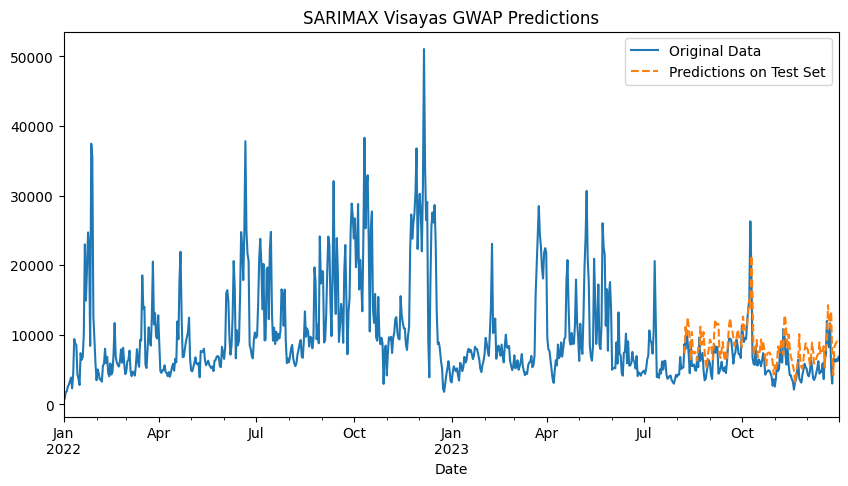

In [22]:
# Calculate MAE for the VISAYAS GWAP test set
mae_test = mean_absolute_error(VIS_GWAP_test_inversed, VIS_GWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the VISAYAS GWAP test set
rmse_test = mean_squared_error(VIS_GWAP_test_inversed, VIS_GWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
VIS_GWAP.plot(ax=ax, label='Original Data')
VIS_GWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Visayas GWAP Predictions')
ax.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



Mean Absolute Error (MAE) on Test Set: 2256.83200920914
Root Mean Squared Error (RMSE) on Test Set: 2888.408992090605


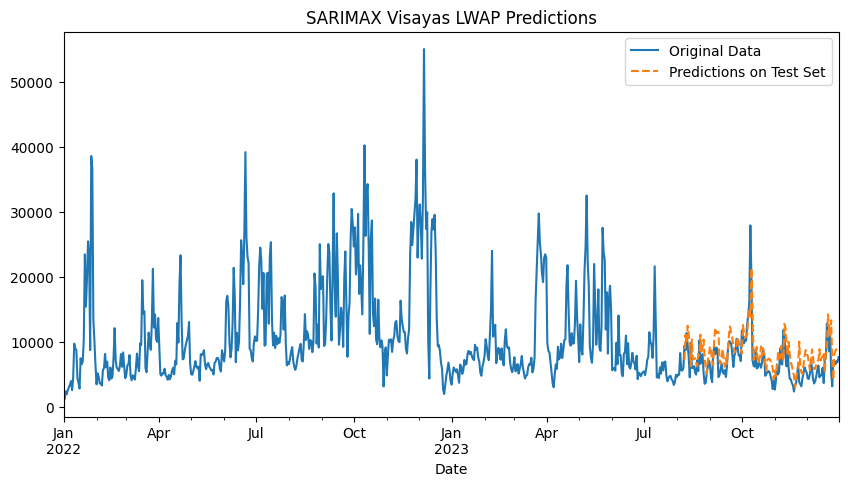

In [23]:
# Calculate MAE for the Visyas LWAP test set
mae_test = mean_absolute_error(VIS_LWAP_test_inversed, VIS_LWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the VISYAS LWAP test set
rmse_test = mean_squared_error(VIS_LWAP_test_inversed, VIS_LWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
VIS_LWAP.plot(ax=ax, label='Original Data')
VIS_LWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Visayas LWAP Predictions')
ax.legend()
plt.show()

In [ ]:
Luzon GWAP Predictions